<a href="https://colab.research.google.com/github/malumisa/test/blob/main/Machine_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import seaborn as sns 
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('/content/Result_Protein_Peptide_Combine.csv')

In [3]:
df.head()

,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,On,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,...,62329,62437,62723,62732,62792,63875,63889,64669,64674,65043
0,0,10.0,6.0,15.0,0.0,0,8984260.0,53855.6,8579740.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,6,8.0,10.0,34.0,0.0,0,8279770.0,45251.9,8655890.0,49927.5,...,0,0,0,0,0,0,0,0,0,0
2,12,10.0,10.0,41.0,0.0,1,8382390.0,53000.9,8995640.0,45519.2,...,0,0,0,0,0,0,0,0,0,0
3,36,17.0,18.0,51.0,0.0,1,10671500.0,58108.4,9985420.0,52374.0,...,0,0,0,0,0,0,0,0,0,0
4,6,8.0,2.0,21.0,0.0,0,6177730.0,42682.6,3596660.0,25698.8,...,0,0,0,0,0,0,0,0,0,0


In [4]:
### Split & Train

# Getting X, Y columns 
y_col = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']
x_col = [x for x in df.columns if x not in y_col]

# Splitting into X and Y 

X = df[x_col]
Y = df[y_col]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

### Scaling Data 

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Conversion to dataframe
scaled_test_df = pd.DataFrame(X_test_scaled, columns = X_test.columns)
scaled_train_df = pd.DataFrame(X_train_scaled, columns = X_train.columns)

### Loading Features 

In [5]:
import ast

In [6]:
df_col = pd.read_csv('/content/features.csv')

In [7]:
df_col.head()

,features
0,"['On', 'FIYGGC(UniMod_4)GGNR', 'P43121', 'TLKI..."
1,"['HLSLLTTLSNR', 'VRGGEGTGYFVDFSVR', 'Q14515', ..."
2,"['On', 'FIYGGC(UniMod_4)GGNR', 'P43121', 'TLKI..."
3,"['HLSLLTTLSNR', 'VKDLATVYVDVLK', 'VRGGEGTGYFVD..."
4,"['On', 'FIYGGC(UniMod_4)GGNR', 'P43121', 'TLKI..."


In [8]:
df_col['features'] = df_col['features'].apply(ast.literal_eval)

In [9]:
remove_corr = df_col['features'].tolist()
remove_corr[0]

['On',
 'FIYGGC(UniMod_4)GGNR',
 'P43121',
 'TLKIENVSYQDKGNYR',
 'P17174',
 'Q06481',
 'O15240',
 'QQETAAAETETR',
 'P05060',
 '40650',
 'P13521',
 'ALEYIENLR',
 'AYQGVAAPFPK',
 'P40925',
 'FVEGLPINDFSR',
 'O00533',
 'VNGSPVDNHPFAGDVVFPR',
 'EAEEETTNDNGVLVLEPARK',
 'VRQGQGQSEPGEYEQR',
 'IGADFLAR',
 'LVFFAEDVGSNK',
 'Q9BY67',
 'VHKEDDGVPVIC(UniMod_4)QVEHPAVTGNLQTQR',
 'FFLC(UniMod_4)QVAGDAK',
 'GEAGAPGEEDIQGPTK',
 'KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK',
 'VFNTPEGVPSAPSSLK',
 'RLEGQEEEEDNRDSSMK',
 'Q6UXD5',
 'EGDMLTLFDGDGPSAR',
 'GATLALTQVTPQDER',
 'QHVVYGPWNLPQSSYSHLTR',
 'LQAEAFQAR',
 'LEEQAQQIR',
 'THLGEALAPLSK',
 'LDEVKEQVAEVR',
 'KLSENTDFLAPGVSSFTDSNQQESITK',
 'P04180',
 'IEIPSSVQQVPTIIK',
 '13618',
 'P10645',
 'P02787',
 'P14618',
 'IKPVFIEDANFGR',
 'SEALAVDGAGKPGAEEAQDPEGK',
 'Q8NBJ4',
 'DTINLLDQR',
 'LIADLGSTSITNLGFR',
 'ISYGNDALMPSLTETK',
 'VGGVQSLGGTGALR',
 'C(UniMod_4)APFFYGGC(UniMod_4)GGNR',
 'P05067',
 'LLRDPADASEAHESSSR',
 'LDIDSPPITAR',
 'STNLHDYGMLLPC(UniMod_4)GIDK',
 'Q

In [10]:
length = [len(x) for x in remove_corr]

print(length)

[382, 1240, 754, 1181, 1080, 1102]


### Cross-Validation with Various Features 
---

![image.png](attachment:image.png)

In [11]:
from keras.layers import LeakyReLU

def train_and_validation(df, range_, folds_ids, length):
    
    #Setting Fold 
    df.loc[df.index[0:213], 'fold'] = 1.0
    df.loc[df.index[213:426], 'fold'] = 2.0
    df.loc[df.index[426:639], 'fold'] = 3.0
    df.loc[df.index[639:852], 'fold'] = 4.0
    df.loc[df.index[852:1069], 'fold'] = 5.0
    
    # For Storing Results
    final_results = dict()
    
    # Getting Y columns 
    y_col = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']
    
    # Indexing columns of choice 
    for index, length in zip(range_, length):
        
        results_average = list()
        
    # Assigning Folds 
        for fold in folds_ids:
            train_df = df[df['fold'] != fold].copy()
            test_df = df[df['fold'] == fold].copy()
            
            # Assign Y Columns
            y_test = test_df[y_col]
            y_train = train_df[y_col]
            
            # Assign X Columns
            x_col = remove_corr[index]
            X_train = train_df[x_col]
            X_test = test_df[x_col]
            
            #Scaling test & train  
            scaler = StandardScaler()

            ### Fit the StandardScaler
            X_scaler = scaler.fit(X_train)

            ### Scale the data
            X_train_scaled = X_scaler.transform(X_train)
            X_test_scaled = X_scaler.transform(X_test)
            
            # Conversion to dataframe
            scaled_test_df = pd.DataFrame(X_test_scaled, columns = X_test.columns)
            scaled_train_df = pd.DataFrame(X_train_scaled, columns = X_train.columns)
            
#             # Calling Neural Network
#             nn_model = tf.keras.models.Sequential()
            
#             # Defining First Layer 
#             nn_model.add(tf.keras.layers.Dense(units=36, activation = LeakyReLU(alpha= 0.1), 
#                                        input_dim = len(scaled_train_df.columns)))

#             # First hidden layer
#             nn_model.add(tf.keras.layers.Dense(units=128, activation="relu"))
#             # Second hidden layer
#             nn_model.add(tf.keras.layers.Dense(units=128, activation="relu"))
#             # Third hidden layer
#             nn_model.add(tf.keras.layers.Dense(units=128, activation="relu"))

#             # Output layer
#             nn_model.add(tf.keras.layers.Dense(units= 4, activation="relu"))

#             #Compile Model
#             nn_model.compile(loss="mean_squared_error", optimizer="adam", metrics= ['mean_squared_error'])
    
#             # Stop Early
#             stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 15)
    
#             # Train Model
#             nn_model.fit(scaled_train_df[remove_corr[index]], y_train, epochs = 200, callbacks = [stop_early])
    
            #load model
            nn_model = keras.models.load_model(f'FeatureSelection/feature_select_nn_{index}_{fold}')

            # Evaluate Model
            model_loss, model_accuracy = nn_model.evaluate(scaled_test_df[remove_corr[index]] , y_test, verbose=2) 
            
            results_average.append(model_accuracy)
            
            # Saving Model 
            #nn_model.save(f'FeatureSelection/feature_select_nn_{index}_{fold}')
        
        
        # Returning Values
        avg_results = np.mean(results_average)
        std_results = np.std(results_average) 
        
        final_results[index] = {'AVG_MSE': avg_results, 
                                'STD_MSE': std_results,
                               'feature length': length}
        
    return final_results

In [12]:
range_ = [i for i in range(0, 6)]
folds_ids = [1, 2, 3, 4, 5]

In [13]:
results_preliminary = train_and_validation(df, range_, folds_ids = folds_ids, length = length)

OSError: ignored

In [14]:
results_prelim = pd.DataFrame(results_preliminary).transpose()

NameError: ignored

In [ ]:
results_prelim.sort_values(by = 'AVG_MSE')

,AVG_MSE,STD_MSE,feature length
4,81.444731,9.445333,1080.0
1,90.158385,5.999007,1240.0
3,92.025259,6.232055,1181.0
5,92.134966,6.881763,1102.0
0,94.992010,10.189912,382.0
2,101.397375,20.591138,754.0


### Optimization

In [15]:
best_features = remove_corr[4]

In [16]:
 # New Sequential model with hyperparameter options
def create_model(hp):
    
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu', 'gelu', 'selu'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=256,
        step=7), activation = activation, input_dim= len(best_features)))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=32,
            max_value=256,
            step=16),
            activation=activation))
    
    # optimizer 
    Optimizer = keras.optimizers.Adam(hp.Choice('learning_rate', values = [1.0, 0.1, 0.01, 0.001, 0.0001]))
    
    nn_model.add(tf.keras.layers.Dense(units=4, activation= hp.Choice('activation', ['relu'])))

    # Compile the model
    nn_model.compile(loss="mean_absolute_error", optimizer = Optimizer, metrics=["mean_squared_error"])
    
    return nn_model

In [18]:
pip install keras-tuner


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.6 MB/s eta 0:00:00


In [19]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective= "mean_squared_error",
    max_epochs= 100,
    directory = 'saved',
    project_name = 'nn_tune_final',
    overwrite = False,
    hyperband_iterations= 2)

In [20]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

tuner.search(scaled_train_df[best_features] ,y_train, 
             epochs = 50, 
             validation_data= (scaled_test_df[best_features], y_test), callbacks=[stop_early])

Trial 508 Complete [00h 00m 10s]
mean_squared_error: 190.63636779785156

Best mean_squared_error So Far: 0.2764931917190552
Total elapsed time: 00h 33m 46s


In [21]:
# Getting Best Parameters
best_params = tuner.get_best_hyperparameters(num_trials=1)[0]
best_params.values

{'activation': 'gelu',
 'first_units': 218,
 'num_layers': 3,
 'units_0': 160,
 'learning_rate': 0.0001,
 'units_1': 256,
 'units_2': 256,
 'units_3': 192,
 'units_4': 80,
 'tuner/epochs': 100,
 'tuner/initial_epoch': 34,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0493'}

In [22]:
best_model = tuner.get_best_models(1)[0]

In [23]:
model_loss, model_accuracy = best_model.evaluate(scaled_test_df[best_features],y_test,verbose=2)
print(f"Loss: {model_loss}, mean_squared_error: {model_accuracy}")

7/7 - 0s - loss: 3.4457 - mean_squared_error: 33.2217 - 277ms/epoch - 40ms/step
Loss: 3.4457242488861084, mean_squared_error: 33.221675872802734


In [24]:
model_loss, model_accuracy = best_model.evaluate(scaled_train_df[best_features],y_train,verbose=2)
print(f"Loss: {model_loss}, mean_squared_error: {model_accuracy}")

27/27 - 0s - loss: 0.2498 - mean_squared_error: 0.2394 - 85ms/epoch - 3ms/step
Loss: 0.24975164234638214, mean_squared_error: 0.23936347663402557


### Cross Validation on Best Model 

In [25]:
best_params.values

{'activation': 'gelu',
 'first_units': 218,
 'num_layers': 3,
 'units_0': 160,
 'learning_rate': 0.0001,
 'units_1': 256,
 'units_2': 256,
 'units_3': 192,
 'units_4': 80,
 'tuner/epochs': 100,
 'tuner/initial_epoch': 34,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0493'}

In [26]:
def best_model_validation(df, folds_ids):
    
    #Setting Fold 
    df.loc[df.index[0:213], 'fold'] = 1.0
    df.loc[df.index[213:426], 'fold'] = 2.0
    df.loc[df.index[426:639], 'fold'] = 3.0
    df.loc[df.index[639:852], 'fold'] = 4.0
    df.loc[df.index[852:1069], 'fold'] = 5.0
    
    # For Storing Final Results
    final_results = dict()
    
    # Getting Y columns 
    y_col = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']
    
    # For Storing Results of Folds
    results_average = list()
        
    # Assigning Folds 
    for fold in folds_ids:
        train_df = df[df['fold'] != fold].copy()
        test_df = df[df['fold'] == fold].copy()
            
        # Assign Y Columns
        y_test = test_df[y_col]
        y_train = train_df[y_col]
            
        # Assign X Columns
        x_col = best_features
        X_train = train_df[x_col]
        X_test = test_df[x_col]
            
        #Scaling test & train  
        scaler = StandardScaler()

        ### Fit the StandardScaler
        X_scaler = scaler.fit(X_train)

        ### Scale the data
        X_train_scaled = X_scaler.transform(X_train)
        X_test_scaled = X_scaler.transform(X_test)
            
        # Conversion to dataframe
        scaled_test_df = pd.DataFrame(X_test_scaled, columns = X_test.columns)
        scaled_train_df = pd.DataFrame(X_train_scaled, columns = X_train.columns)
            
#         # Calling Neural Network
#         nn_model = tf.keras.models.Sequential()
            
#         # Defining First Layer 
#         nn_model.add(tf.keras.layers.Dense(units=148, activation = 'selu', 
#                                        input_dim = len(scaled_train_df.columns)))

#         # First hidden layer
#         nn_model.add(tf.keras.layers.Dense(units=80, activation="selu"))
#         # Second hidden layer
#         nn_model.add(tf.keras.layers.Dense(units=176, activation="selu"))

#         # Output layer
#         nn_model.add(tf.keras.layers.Dense(units= 4, activation="selu"))

#         #Compile Model
#         nn_model.compile(loss="mean_squared_error", optimizer="adam", metrics= ['mean_squared_error'])
    
#         # Train Model
#         nn_model.fit(scaled_train_df[best_features], y_train, epochs = 100)
    
        #load model
        nn_model = keras.models.load_model(f'FeatureSelection/feature_select_nn_best_model_{fold}')

        # Evaluate Model
        model_loss, model_accuracy = nn_model.evaluate(scaled_test_df[best_features] , y_test, verbose=2) 
            
        results_average.append(model_accuracy)
            
        # Saving Model 
        #nn_model.save(f'FeatureSelection/feature_select_nn_best_model_{fold}')
        
        
    # Returning Values
    avg_results = np.mean(results_average)
    std_results = np.std(results_average) 
        
    final_results['Results'] = {'AVG_MSE': avg_results, 
                            'STD_MSE': std_results,
                            'All Results': results_average}
        
    return final_results

In [ ]:
best_model_test = best_model_validation(df, folds_ids)

7/7 - 0s - loss: 94.3120 - mean_squared_error: 94.3120 - 88ms/epoch - 13ms/step
7/7 - 0s - loss: 88.7893 - mean_squared_error: 88.7893 - 86ms/epoch - 12ms/step
7/7 - 0s - loss: 74.7173 - mean_squared_error: 74.7173 - 91ms/epoch - 13ms/step
7/7 - 0s - loss: 81.2498 - mean_squared_error: 81.2498 - 87ms/epoch - 12ms/step
7/7 - 0s - loss: 75.6258 - mean_squared_error: 75.6258 - 91ms/epoch - 13ms/step


In [ ]:
best_model_test

{'Results': {'AVG_MSE': 82.93883056640625,
  'STD_MSE': 7.582940410223574,
  'All Results': [94.31202697753906,
   88.78929138183594,
   74.71730041503906,
   81.24977111816406,
   75.62576293945312]}}

### Regularization 

In [ ]:
# regulariztion_values
range_ = [0, 0.001, 0.01, 0.1, 0.5, 0.8, 1.0]

In [ ]:
from keras.layers import LeakyReLU

def regularization(df, range_, folds_ids):
    
    #Setting Fold 
    df.loc[df.index[0:213], 'fold'] = 1.0
    df.loc[df.index[213:426], 'fold'] = 2.0
    df.loc[df.index[426:639], 'fold'] = 3.0
    df.loc[df.index[639:852], 'fold'] = 4.0
    df.loc[df.index[852:1069], 'fold'] = 5.0
    
    # For Storing Results
    final_results = dict()
    
    # Getting Y columns 
    y_col = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']
    
    # Indexing columns of choice 
    for index in range_:
        
        results_average = list()
        
    # Assigning Folds 
        for fold in folds_ids:
            train_df = df[df['fold'] != fold].copy()
            test_df = df[df['fold'] == fold].copy()
            
            # Assign Y Columns
            y_test = test_df[y_col]
            y_train = train_df[y_col]
            
            # Assign X Columns
            x_col = best_features
            X_train = train_df[x_col]
            X_test = test_df[x_col]
            
            #Scaling test & train  
            scaler = StandardScaler()

            ### Fit the StandardScaler
            X_scaler = scaler.fit(X_train)

            ### Scale the data
            X_train_scaled = X_scaler.transform(X_train)
            X_test_scaled = X_scaler.transform(X_test)
            
            # Conversion to dataframe
            scaled_test_df = pd.DataFrame(X_test_scaled, columns = X_test.columns)
            scaled_train_df = pd.DataFrame(X_train_scaled, columns = X_train.columns)
            
#             # Calling Neural Network
#             nn_model = tf.keras.models.Sequential()
            
#             # Defining First Layer 
#             nn_model.add(tf.keras.layers.Dense(units=36, activation = LeakyReLU(alpha= 0.1), 
#                                     input_dim = len(scaled_train_df[best_features].columns),
#                                     kernel_initializer='ones',
#                                     activity_regularizer=tf.keras.regularizers.L2(index)))

#             # First hidden layer
#             nn_model.add(tf.keras.layers.Dense(units=128, activation="relu"))
#             # Second hidden layer
#             nn_model.add(tf.keras.layers.Dense(units=128, activation="relu"))
#             # Third hidden layer
#             nn_model.add(tf.keras.layers.Dense(units=128, activation="relu"))

#             # Output layer
#             nn_model.add(tf.keras.layers.Dense(units= 4, activation="relu"))

#             #Compile Model
#             nn_model.compile(loss="mean_squared_error", optimizer="adam", metrics= ['mean_squared_error'])
    
#             # Stop Early
#             stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 15)
    
#             # Train Model
#             nn_model.fit(scaled_train_df[best_features], y_train, epochs = 150, callbacks = [stop_early])
    
            #load model
            nn_model = keras.models.load_model(f'FeatureSelection/feature_select_nn_reg_{index}_{fold}')

            # Evaluate Model
            model_loss, model_accuracy = nn_model.evaluate(scaled_test_df[best_features] , y_test, verbose=2) 
            
            results_average.append(model_accuracy)
            
            # Saving Model 
            #n_model.save(f'FeatureSelection/feature_select_nn_reg_{index}_{fold}')
        
        
        # Returning Values
        avg_results = np.mean(results_average)
        std_results = np.std(results_average) 
        
        final_results[index] = {'AVG_MSE': avg_results, 
                                'STD_MSE': std_results,
                                'All Results': results_average}
        
    return final_results

In [ ]:
results_reg = regularization(df, range_, folds_ids)

7/7 - 0s - loss: 158.0483 - mean_squared_error: 158.0483 - 99ms/epoch - 14ms/step
7/7 - 0s - loss: 118.8379 - mean_squared_error: 118.8379 - 100ms/epoch - 14ms/step
7/7 - 0s - loss: 98.5398 - mean_squared_error: 98.5398 - 99ms/epoch - 14ms/step
7/7 - 0s - loss: 188.6232 - mean_squared_error: 188.6232 - 98ms/epoch - 14ms/step
7/7 - 0s - loss: 106.8216 - mean_squared_error: 106.8216 - 97ms/epoch - 14ms/step
7/7 - 0s - loss: 98.3790 - mean_squared_error: 89.8910 - 101ms/epoch - 14ms/step
7/7 - 0s - loss: 108.1625 - mean_squared_error: 92.3119 - 99ms/epoch - 14ms/step
7/7 - 0s - loss: 79.7267 - mean_squared_error: 71.6242 - 102ms/epoch - 15ms/step
7/7 - 0s - loss: 189.0635 - mean_squared_error: 188.6232 - 99ms/epoch - 14ms/step
7/7 - 0s - loss: 87.7296 - mean_squared_error: 82.2549 - 101ms/epoch - 14ms/step
7/7 - 0s - loss: 107.4373 - mean_squared_error: 94.8213 - 103ms/epoch - 15ms/step
7/7 - 0s - loss: 102.5066 - mean_squared_error: 91.0888 - 98ms/epoch - 14ms/step
7/7 - 0s - loss: 80.28

In [ ]:
df_best_model = pd.DataFrame(results_reg).transpose()

In [ ]:
df_best_model.drop(['AVG_MSE', 'STD_MSE'], axis = 1, inplace = True)

In [ ]:
df_best_model = df_best_model.explode('All Results').reset_index()

In [ ]:
df_best_model.rename({'index': 'L2 Regularization', 'All Results':'Avg MSE'}, axis = 1, inplace = True)

In [ ]:
df_best_model.columns

Index(['L2 Regularization', 'Avg MSE'], dtype='object')

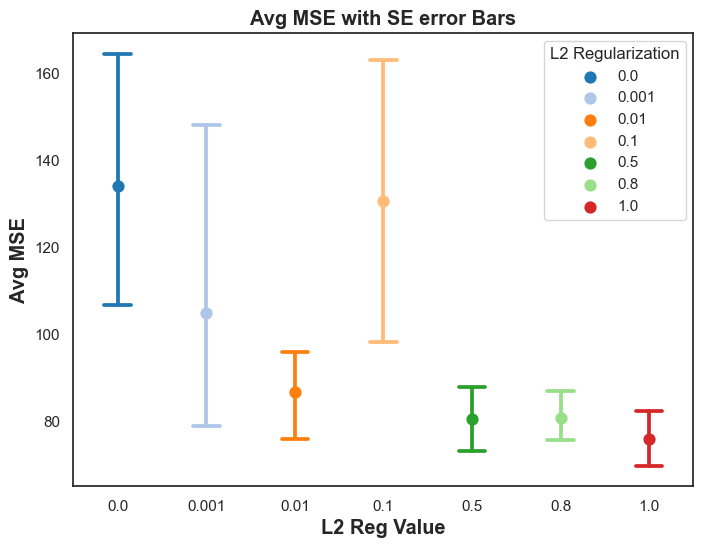

In [ ]:
sns.set_palette("tab20")

plt.figure(figsize=(8, 6), dpi=100)
sns.pointplot(
    data= df_best_model , x="L2 Regularization", y="Avg MSE",
    errorbar=("se", 50), capsize=.3, join=False, hue="L2 Regularization")

plt.title('Avg MSE with SE error Bars',  fontsize='large', fontweight='bold')
plt.xlabel('L2 Reg Value',  fontsize='large', fontweight='bold')
plt.ylabel('Avg MSE',  fontsize='large', fontweight='bold')

plt.show()

## Final Prediction 

### Data transformation 

In [ ]:
### Split & Train

# Getting X, Y columns 
y_col = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']
x_col = [x for x in df.columns if x not in y_col]

# Splitting into X and Y 

X = df[x_col]
Y = df[y_col]


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

### Scaling Data 

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Conversion to dataframe
scaled_test_df = pd.DataFrame(X_test_scaled, columns = X_test.columns)
scaled_train_df = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [ ]:
best_params.values

{'activation': 'selu',
 'first_units': 148,
 'num_layers': 2,
 'units_0': 80,
 'learning_rate': 0.001,
 'units_1': 80,
 'units_2': 176,
 'units_3': 240,
 'units_4': 256,
 'tuner/epochs': 100,
 'tuner/initial_epoch': 34,
 'tuner/bracket': 3,
 'tuner/round': 3,
 'tuner/trial_id': '0196'}

In [ ]:
from keras.layers import LeakyReLU

def final_model(df):
        ### Split & Train

        # Getting X, Y columns 
        y_col = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']
        x_col = [x for x in df.columns if x not in y_col]

        # Splitting into X and Y 

        X = df[x_col]
        Y = df[y_col]

        # Split the preprocessed data into a training and testing dataset
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

        ### Scaling Data 

        # Create a StandardScaler instances
        scaler = StandardScaler()

        # Fit the StandardScaler
        X_scaler = scaler.fit(X_train)

        # Scale the data
        X_train_scaled = X_scaler.transform(X_train)
        X_test_scaled = X_scaler.transform(X_test)

        # Conversion to dataframe
        scaled_test_df = pd.DataFrame(X_test_scaled, columns = X_test.columns)
        scaled_train_df = pd.DataFrame(X_train_scaled, columns = X_train.columns)
            
#         # Calling Neural Network
#         nn_model = tf.keras.models.Sequential()
            
#         # Defining First Layer 
#         nn_model.add(tf.keras.layers.Dense(units=36, activation = LeakyReLU(alpha= 0.1), 
#                                     input_dim = len(scaled_train_df[best_features].columns),
#                                     kernel_initializer='ones',
#                                     activity_regularizer=tf.keras.regularizers.L2(1.0)))

#         # First hidden layer
#         nn_model.add(tf.keras.layers.Dense(units=128, activation="relu"))
#         # Second hidden layer
#         nn_model.add(tf.keras.layers.Dense(units=128, activation="relu"))
#         # Third hidden layer
#         nn_model.add(tf.keras.layers.Dense(units=128, activation="relu"))

#         # Output layer
#         nn_model.add(tf.keras.layers.Dense(units= 4, activation="relu"))

#         #Compile Model
#         nn_model.compile(loss="mean_squared_error", optimizer="adam", metrics= ['mean_squared_error'])
    
#         # Stop Early
#         stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 10)
    
#         # Train Model
#         nn_model.fit(scaled_train_df[best_features], y_train, epochs = 150, callbacks = [stop_early], verbose = 0)
    
        #load model
        nn_model = keras.models.load_model(f'FeatureSelection/final_model_5.h5')

        # Evaluate Model
        model_loss, model_accuracy = nn_model.evaluate(scaled_test_df[best_features] , y_test, verbose= -1) 
        
        # Evaluate Train 
        model_loss_train, model_accuracy_train = nn_model.evaluate(scaled_train_df[best_features] , y_train, verbose= -1) 
        
        # Prediction    
        y_pred = nn_model.predict(scaled_test_df[best_features]) 
        
        # Saving Model 
        #nn_model.save(f'FeatureSelection/final_model_10.h5')
        
        return model_accuracy, model_accuracy_train, y_pred, y_test

In [ ]:
model_accuracy, model_accuracy_train, y_pred, y_test = final_model(df)
print(model_accuracy, model_accuracy_train)

7/7 [==============================] - 0s 1ms/step
36.189395904541016 28.114030838012695


In [ ]:
#for i in range(20):
    #model_accuracy, model_accuracy_train, y_pred = final_model(df, i)
    #print(model_accuracy, model_accuracy_train)

In [ ]:
sum_ = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']

In [ ]:
y_pred = pd.DataFrame(y_pred, columns = sum_)

In [ ]:
y_test.reset_index(inplace = True)

In [ ]:
y_pred['sum_score'] = y_pred[sum_].sum(axis = 1)
y_test['sum_score'] = y_test[sum_].sum(axis = 1)

In [ ]:
Y_test_final = y_test['sum_score'].tolist()
Y_Pred_final = y_pred['sum_score'].tolist()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


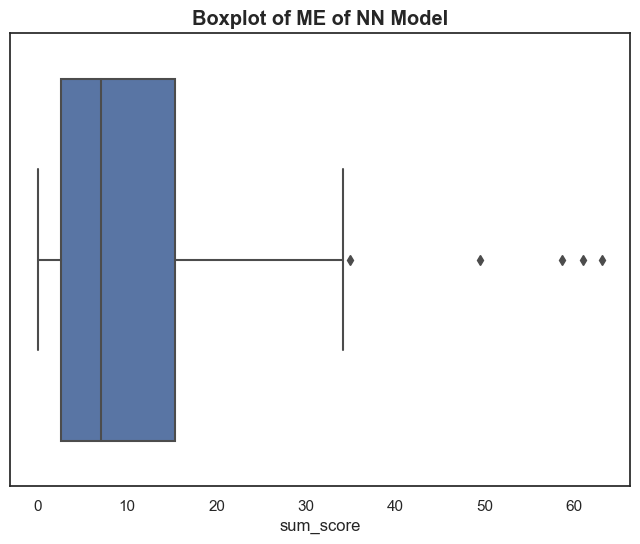

In [ ]:
me = abs(y_test['sum_score'] - y_pred['sum_score'])
plt.figure(figsize=(8, 6), dpi=100)
sns.boxplot(me)
plt.title('Boxplot of ME of NN Model', fontsize='large', fontweight='bold')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


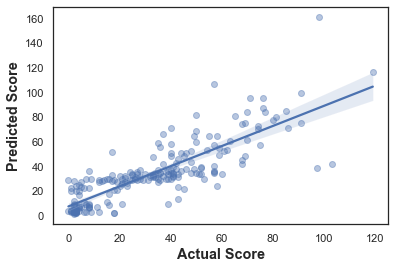

In [ ]:
sns.set(color_codes=True)
sns.set_style("white")
ax = sns.regplot(Y_test_final, Y_Pred_final, scatter_kws={'alpha':0.4})
ax.set_xlabel('Actual Score', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted Score', fontsize='large', fontweight='bold')



plt.show()

In [ ]:
from sklearn.metrics import r2_score

round(r2_score(Y_Pred_final, Y_test_final), 2)

0.65